##Hecho por **Santiago Leonardo Hernandez Beltran**

In [77]:
import pandas as pd
import openpyxl
from sklearn.preprocessing import StandardScaler

# 1. Leer el archivo Excel
df = pd.read_csv("dataset_limpio2.csv")

# 2. Ver info básica
print("\n--- Información inicial ---")
df.info()
print("\n--- Primeras filas ---")
print(df.head())




/tmp/ipython-input-2384516468.py:6: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_limpio2.csv")



--- Información inicial ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668427 entries, 0 to 668426
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Mes-Año          668427 non-null  object 
 1   Parte            50274 non-null   object 
 2   sexo             668427 non-null  object 
 3   profundidad      366630 non-null  float64
 4   pesokg           667257 non-null  float64
 5   porcentajemagro  366621 non-null  float64
 6   Departamento     668427 non-null  object 
 7   Municipio        668427 non-null  object 
 8   Patologia        50274 non-null   object 
dtypes: float64(3), object(6)
memory usage: 45.9+ MB

--- Primeras filas ---
   Mes-Año      Parte sexo  profundidad  pesokg  porcentajemagro Departamento  \
0  07-2024  Diafragma    M        50.66     0.0        54.214592    Antioquia   
1  07-2024  Diafragma    M        50.66     0.0        54.214592    Antioquia   
2  07-2024        NaN   

In [78]:
# Verificar
print(df["profundidad"].value_counts(dropna=False))
print(df["porcentajemagro"].value_counts(dropna=False))


profundidad
NaN         301797
69.2          6295
68.0          6250
67.6          6249
69.6          6212
             ...  
12.0             1
656236.0         1
656275.0         1
49.0             1
736922.0         1
Name: count, Length: 186, dtype: int64
porcentajemagro
NaN          301806
64.213430       297
64.891045       289
64.677980       284
64.059800       282
              ...  
71.122154         1
51.207060         1
59.768190         1
65.360100         1
56.232407         1
Name: count, Length: 13195, dtype: int64


In [79]:
print(df["sexo"].value_counts(dropna=False))

sexo
M                       654984
H                        13074
Bufalo macho               133
Macho                      103
Hembra                      89
Bufalo hembra               36
Macho castrado               4
Vaca                         2
Macho inmunocastrado         2
Name: count, dtype: int64


In [80]:
#Si esta nulo, es que el animal está sano
df['Parte']=df["Parte"].fillna("Sano")
df['Patologia']=df["Patologia"].fillna("Sano")

In [81]:
import numpy as np

# Reemplazar valores que no sean 'H' o 'M' por NaN
df.loc[~df["sexo"].isin(["H", "M"]), "sexo"] = np.nan


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668427 entries, 0 to 668426
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Mes-Año          668427 non-null  object 
 1   Parte            668427 non-null  object 
 2   sexo             668058 non-null  object 
 3   profundidad      366630 non-null  float64
 4   pesokg           667257 non-null  float64
 5   porcentajemagro  366621 non-null  float64
 6   Departamento     668427 non-null  object 
 7   Municipio        668427 non-null  object 
 8   Patologia        668427 non-null  object 
dtypes: float64(3), object(6)
memory usage: 45.9+ MB


In [83]:
# 3. Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [84]:
# Numéricos -> promedio
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categóricos -> moda
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [85]:
# Verificar
print(df["profundidad"].value_counts(dropna=False))
print(df["porcentajemagro"].value_counts(dropna=False))
print(df["sexo"].value_counts(dropna=False))


profundidad
73.037174        301797
69.200000          6295
68.000000          6250
67.600000          6249
69.600000          6212
                  ...  
12.000000             1
656236.000000         1
656275.000000         1
49.000000             1
736922.000000         1
Name: count, Length: 186, dtype: int64
porcentajemagro
63.894333    301806
64.213430       297
64.891045       289
64.677980       284
64.059800       282
              ...  
71.122154         1
51.207060         1
59.768190         1
65.360100         1
56.232407         1
Name: count, Length: 13195, dtype: int64
sexo
M    655353
H     13074
Name: count, dtype: int64


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668427 entries, 0 to 668426
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Mes-Año          668427 non-null  object 
 1   Parte            668427 non-null  object 
 2   sexo             668427 non-null  object 
 3   profundidad      668427 non-null  float64
 4   pesokg           668427 non-null  float64
 5   porcentajemagro  668427 non-null  float64
 6   Departamento     668427 non-null  object 
 7   Municipio        668427 non-null  object 
 8   Patologia        668427 non-null  object 
dtypes: float64(3), object(6)
memory usage: 45.9+ MB


In [87]:
df = df.astype({col: "category" for col in df.select_dtypes(include="object").columns})

In [88]:
df.head(5)

,Mes-Año,Parte,sexo,profundidad,pesokg,porcentajemagro,Departamento,Municipio,Patologia
0,07-2024,Diafragma,M,50.66,0.0,54.214592,Antioquia,Medellin,Alteracion de color
1,07-2024,Diafragma,M,50.66,0.0,54.214592,Antioquia,Medellin,Abscesos
2,07-2024,Sano,M,70.44,78.7,58.230923,Antioquia,Medellin,Sano
3,07-2024,Sano,M,66.24,78.5,56.855580,Antioquia,Medellin,Sano
4,07-2024,Sano,M,70.44,77.1,58.230923,Antioquia,Medellin,Sano


In [89]:
# Separar la columna "Mes-Año"
df[['Mes', 'Año']] = df['Mes-Año'].str.split('-', expand=True)

# Opcional: convertir a numérico
df['Mes'] = df['Mes'].astype(int)
df['Año'] = df['Año'].astype(int)

# Verificar resultado
print(df[['Mes-Año', 'Mes', 'Año']].head())

df = df.drop(columns=["Mes-Año"])


   Mes-Año  Mes   Año
0  07-2024    7  2024
1  07-2024    7  2024
2  07-2024    7  2024
3  07-2024    7  2024
4  07-2024    7  2024


In [90]:
df.head(5)

,Parte,sexo,profundidad,pesokg,porcentajemagro,Departamento,Municipio,Patologia,Mes,Año
0,Diafragma,M,50.66,0.0,54.214592,Antioquia,Medellin,Alteracion de color,7,2024
1,Diafragma,M,50.66,0.0,54.214592,Antioquia,Medellin,Abscesos,7,2024
2,Sano,M,70.44,78.7,58.230923,Antioquia,Medellin,Sano,7,2024
3,Sano,M,66.24,78.5,56.855580,Antioquia,Medellin,Sano,7,2024
4,Sano,M,70.44,77.1,58.230923,Antioquia,Medellin,Sano,7,2024


In [91]:
# Columnas a limpiar
columnas = ["profundidad", "porcentajemagro", "pesokg"]  # reemplaza con tus columnas

df_limpio = df.copy()

for col in columnas:
    p5 = df_limpio[col].quantile(0.25)
    p95 = df_limpio[col].quantile(0.85)
    media = df_limpio[col].mean()

    # Reemplazar valores menores al percentil 5 o mayores al 95 por la media
    df_limpio[col] = df_limpio[col].apply(lambda x: media if x < p5 or x > p95 else x)

print(df_limpio.head())



       Parte sexo  profundidad      pesokg  porcentajemagro Departamento  \
0  Diafragma    M    73.037174  120.622602        63.894333    Antioquia   
1  Diafragma    M    73.037174  120.622602        63.894333    Antioquia   
2       Sano    M    70.440000  120.622602        63.894333    Antioquia   
3       Sano    M    73.037174  120.622602        63.894333    Antioquia   
4       Sano    M    70.440000  120.622602        63.894333    Antioquia   

  Municipio            Patologia  Mes   Año  
0  Medellin  Alteracion de color    7  2024  
1  Medellin             Abscesos    7  2024  
2  Medellin                 Sano    7  2024  
3  Medellin                 Sano    7  2024  
4  Medellin                 Sano    7  2024  


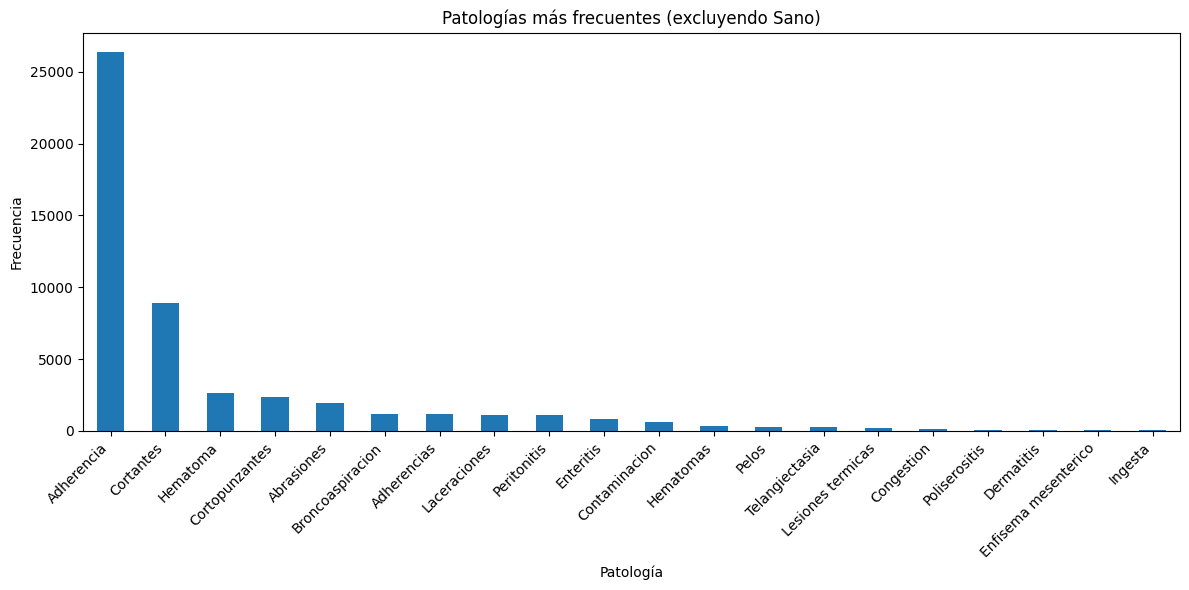

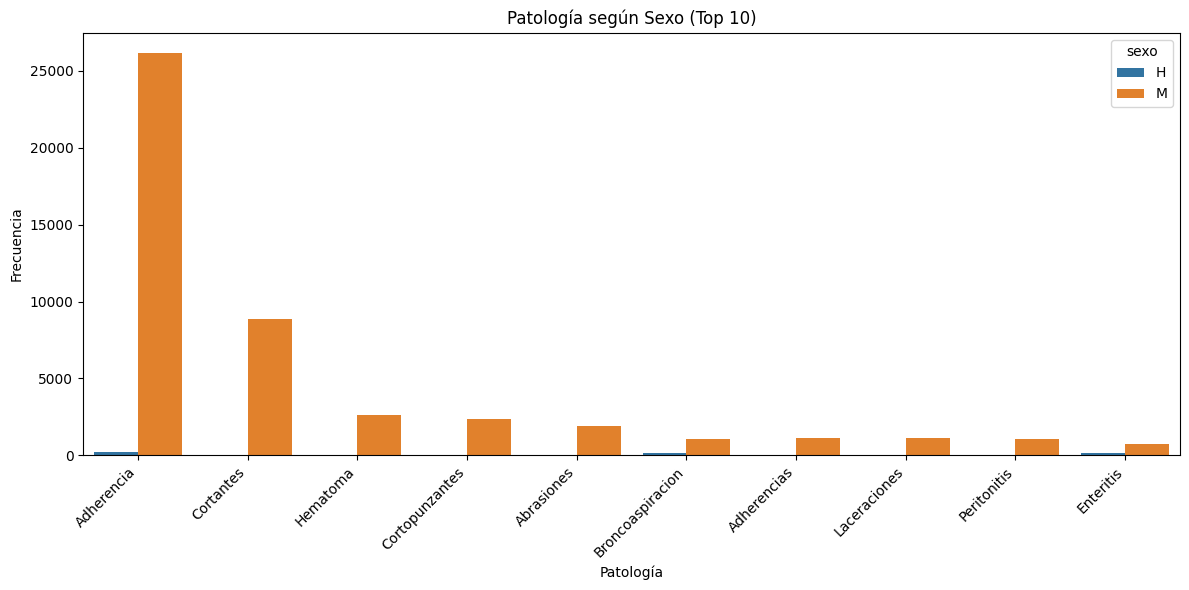

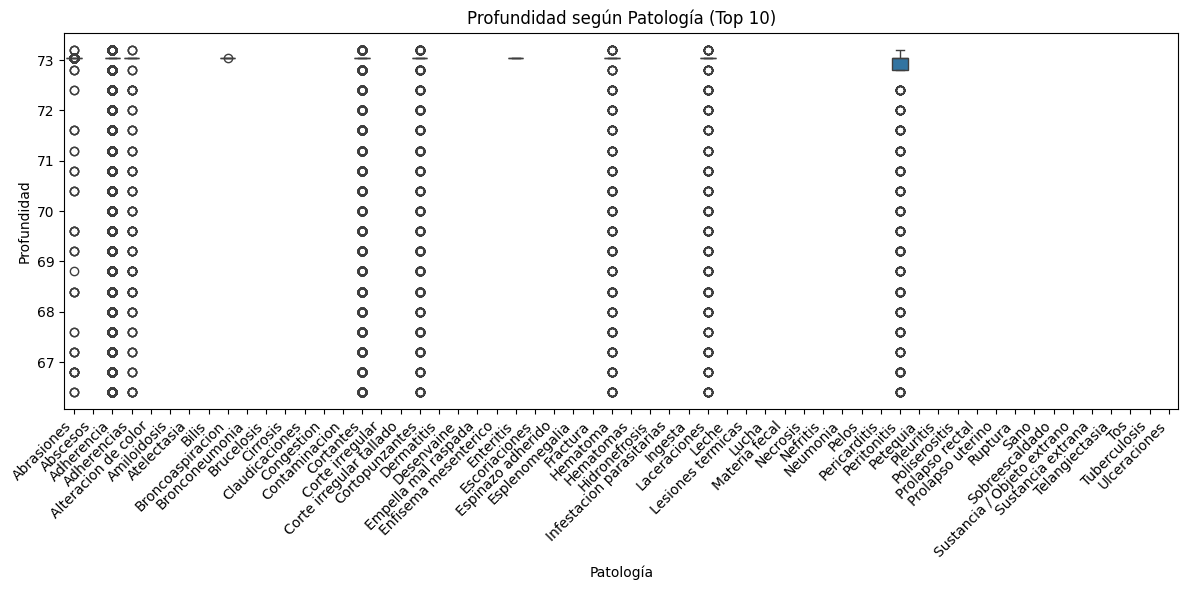

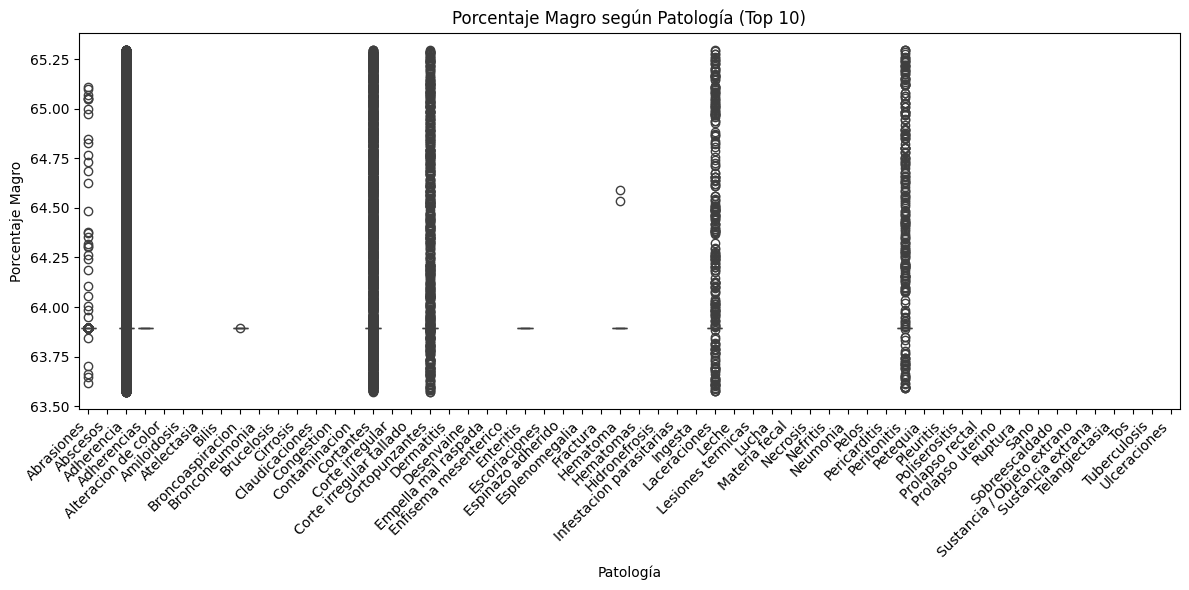

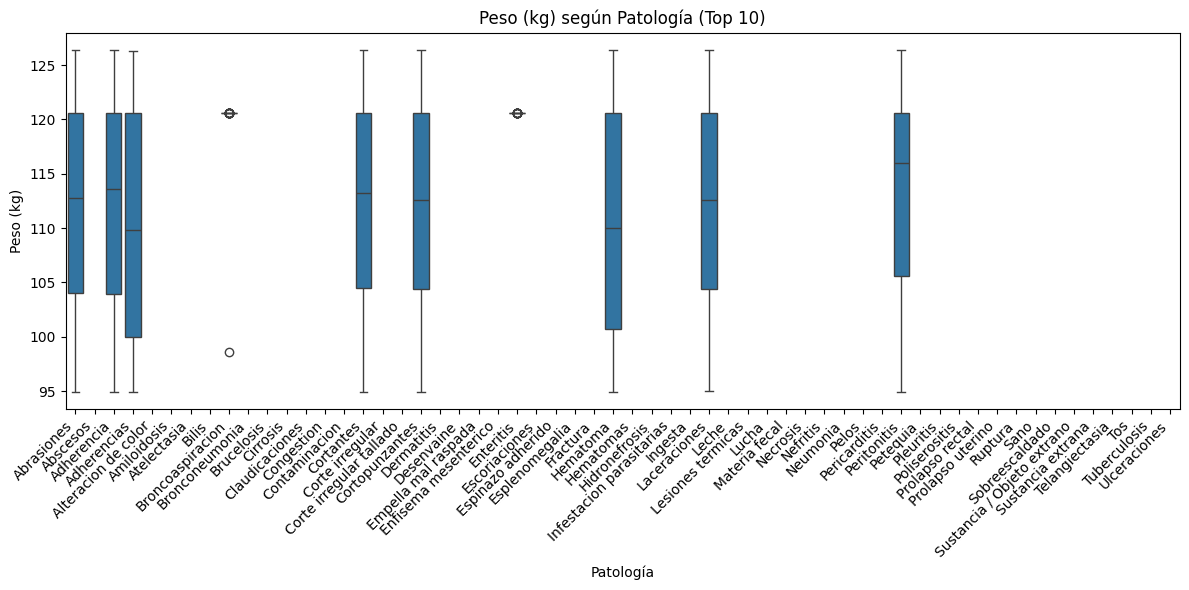

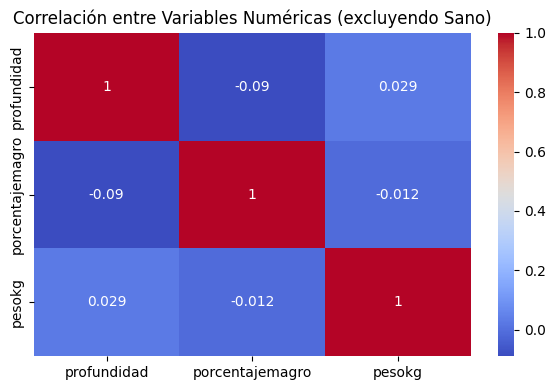

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar las filas donde Patologia no es "Sano"
df_sin_sano = df_limpio[df_limpio["Patologia"] != "Sano"]

# Contar patologías excluyendo "Sano"
conteo = df_sin_sano["Patologia"].value_counts()

# 1. Filtrar las filas donde Patologia no es "Sano"
df_sin_sano = df_limpio[df_limpio["Patologia"] != "Sano"]

# 1.1 Conteo de patologías
conteo = df_sin_sano["Patologia"].value_counts()

plt.figure(figsize=(12, 6))
conteo.head(20).plot(kind="bar")
plt.title("Patologías más frecuentes (excluyendo Sano)")
plt.xlabel("Patología")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Patología según sexo (usamos countplot para ver la distribución)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sin_sano, x="Patologia", hue="sexo", order=conteo.head(10).index)
plt.title("Patología según Sexo (Top 10)")
plt.xlabel("Patología")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Boxplot de profundidad según patología (solo top 10 para que sea legible)
top10 = conteo.head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_sano[df_sin_sano["Patologia"].isin(top10)],
            x="Patologia", y="profundidad")
plt.title("Profundidad según Patología (Top 10)")
plt.xlabel("Patología")
plt.ylabel("Profundidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Porcentaje magro vs patología (usamos boxplot también)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_sano[df_sin_sano["Patologia"].isin(top10)],
            x="Patologia", y="porcentajemagro")
plt.title("Porcentaje Magro según Patología (Top 10)")
plt.xlabel("Patología")
plt.ylabel("Porcentaje Magro")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Peso vs patología (también boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_sano[df_sin_sano["Patologia"].isin(top10)],
            x="Patologia", y="pesokg")
plt.title("Peso (kg) según Patología (Top 10)")
plt.xlabel("Patología")
plt.ylabel("Peso (kg)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Mapa de calor de correlaciones numéricas
plt.figure(figsize=(6, 4))
sns.heatmap(df_sin_sano[["profundidad", "porcentajemagro", "pesokg"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables Numéricas (excluyendo Sano)")
plt.tight_layout()
plt.show()


In [93]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numeric_features = ["profundidad", "pesokg", "porcentajemagro"]
scaler = MinMaxScaler()

# Ajustar y transformar las columnas numéricas
df_limpio[numeric_features] = scaler.fit_transform(df_limpio[numeric_features])


In [94]:
df_limpio.head(5)

,Parte,sexo,profundidad,pesokg,porcentajemagro,Departamento,Municipio,Patologia,Mes,Año
0,Diafragma,M,0.976055,0.816591,0.18762,Antioquia,Medellin,Alteracion de color,7,2024
1,Diafragma,M,0.976055,0.816591,0.18762,Antioquia,Medellin,Abscesos,7,2024
2,Sano,M,0.594118,0.816591,0.18762,Antioquia,Medellin,Sano,7,2024
3,Sano,M,0.976055,0.816591,0.18762,Antioquia,Medellin,Sano,7,2024
4,Sano,M,0.594118,0.816591,0.18762,Antioquia,Medellin,Sano,7,2024


In [95]:
df_limpio.head(5)

,Parte,sexo,profundidad,pesokg,porcentajemagro,Departamento,Municipio,Patologia,Mes,Año
0,Diafragma,M,0.976055,0.816591,0.18762,Antioquia,Medellin,Alteracion de color,7,2024
1,Diafragma,M,0.976055,0.816591,0.18762,Antioquia,Medellin,Abscesos,7,2024
2,Sano,M,0.594118,0.816591,0.18762,Antioquia,Medellin,Sano,7,2024
3,Sano,M,0.976055,0.816591,0.18762,Antioquia,Medellin,Sano,7,2024
4,Sano,M,0.594118,0.816591,0.18762,Antioquia,Medellin,Sano,7,2024


In [96]:
# -----------------------------
# Preparar DataFrame para entrenamiento
# -----------------------------
df_limpio = df.copy()
target_col = 'Patologia'

# Convertir Patologia a binaria: Sano vs Enfermo
df_limpio[target_col] = df_limpio[target_col].apply(lambda x: "Sano" if x == "Sano" else "Enfermo")

# Mapear Patologia a 0 y 1
df_limpio[target_col] = df_limpio[target_col].map({"Sano": 0, "Enfermo": 1})

# -----------------------------
# Hacer lo mismo con columna Parte
# -----------------------------
# Convertir Parte a binaria: Sano vs Enfermo
df_limpio['Parte'] = df_limpio['Parte'].apply(lambda x: "Sano" if x == "Sano" else "Enfermo")

# Mapear Parte a 0 y 1
df_limpio['Parte'] = df_limpio['Parte'].map({"Sano": 0, "Enfermo": 1})


In [97]:
df_limpio['Patologia'].value_counts()
df_limpio['Parte'].value_counts()

,count
Parte,
0,618153
1,50274


In [98]:
df_limpio.drop(columns=["Año","Municipio"], inplace=True)

In [112]:
df_limpio.head(5)

,Parte,sexo,profundidad,pesokg,porcentajemagro,Departamento,Patologia,Mes
0,1,M,50.66,0.0,54.214592,Antioquia,1,7
1,1,M,50.66,0.0,54.214592,Antioquia,1,7
2,0,M,70.44,78.7,58.230923,Antioquia,0,7
3,0,M,66.24,78.5,56.855580,Antioquia,0,7
4,0,M,70.44,77.1,58.230923,Antioquia,0,7


In [100]:
print(df["Departamento"].value_counts(dropna=False))

Departamento
Cundinamarca       311442
Meta               117310
Antioquia           75249
Boyaca              64301
Casanare            30215
Caldas              17988
Tolima              16980
Santander            9516
Valle del Cauca      8837
Guaviare             6420
Arauca               5026
Risaralda            3564
Caqueta               800
Quindio               561
Huila                 137
Cauca                  60
Cesar                  21
Name: count, dtype: int64


In [76]:
print(df_limpio['Patologia'].value_counts(normalize=True))


Patologia
Sano       0.924788
Enfermo    0.075212
Name: proportion, dtype: float64


In [101]:
# Tomar el 10% de los datos de forma aleatoria, pero reproducible
df_sample = df_limpio.sample(frac=0.1, random_state=42)

print(f"Filas originales: {len(df_limpio)}, Filas en la muestra: {len(df_sample)}")
df_sample.head()


Filas originales: 668427, Filas en la muestra: 66843


,Parte,sexo,profundidad,pesokg,porcentajemagro,Departamento,Patologia,Mes
590407,0,M,77.200000,107.9,63.472736,Antioquia,0,7
429964,0,M,73.037174,116.6,63.894333,Cundinamarca,0,5
153572,0,M,73.037174,111.1,63.894333,Cundinamarca,0,11
42602,0,M,73.037174,78.2,63.894333,Meta,0,8
267330,0,M,73.037174,91.1,63.894333,Cundinamarca,0,1


In [109]:
df_limpio['Patologia'].value_counts(normalize=True)

,proportion
Patologia,
0,0.924788
1,0.075212


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import gc

# -----------------------------
# Preparar DataFrame
# -----------------------------
df_limpio = df.copy()
target_col = 'Patologia'

X = df_limpio.drop(columns=[target_col])
y = df_limpio[target_col]

# Codificar categóricas
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)  # menos uso de RAM

# Detectar tipo de target
if y.dtype == 'object' or y.dtype.name == 'category':
    problema = 'clasificacion'
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("Problema: Clasificación")
else:
    problema = 'regresion'
    y_encoded = y.values
    print("Problema: Regresión")

# Guardar artefactos para despliegue
with open("train_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
if problema == 'clasificacion':
    with open("label_encoder.pkl", "wb") as f:
        pickle.dump(le, f)

# -----------------------------
# Definir red neuronal
# -----------------------------
input_size = X_scaled.shape[1]
hidden_sizes = [min(128, input_size*2), min(64, input_size)]  # evitar redes muy grandes

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, problema):
        super().__init__()
        layers = []
        prev_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(prev_size, h))
            layers.append(nn.ReLU())
            prev_size = h
        if problema == 'clasificacion':
            layers.append(nn.Linear(prev_size, len(np.unique(y_encoded))))
        else:
            layers.append(nn.Linear(prev_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# -----------------------------
# Entrenamiento con K-Fold
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_splits = 5
epochs = 8
batch_size = 512 if X_scaled.shape[0] < 200_000 else 256  # batch más pequeño si el dataset es muy grande

kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) if problema == 'clasificacion' \
    else KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_scores_nn, fold_scores_rf, fold_scores_lr = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled, y_encoded)):
    print(f"\n🔄 Entrenando fold {fold+1}/{n_splits}...")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # =======================
    # Modelo 1 - Red Neuronal
    # =======================
    model = MLP(input_size, hidden_sizes, problema).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss() if problema == 'clasificacion' else nn.MSELoss()

    train_dataset = TensorDataset(
        torch.tensor(X_train, dtype=torch.float32),
        torch.tensor(y_train, dtype=torch.long if problema == 'clasificacion' else torch.float32)
    )
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Entrenamiento
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb) if problema == 'clasificacion' else criterion(outputs.squeeze(), yb)
            loss.backward()
            optimizer.step()

    # Evaluación
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
        y_test_tensor = torch.tensor(y_test, dtype=torch.long if problema == 'clasificacion' else torch.float32).to(device)
        preds = model(X_test_tensor)
        if problema == 'clasificacion':
            acc = (preds.argmax(dim=1) == y_test_tensor).float().mean().item()
            fold_scores_nn.append(acc)
        else:
            mse = ((preds.squeeze() - y_test_tensor)**2).mean().item()
            fold_scores_nn.append(mse)

    # =======================
    # Modelo 2 - Random Forest
    # =======================
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    fold_scores_rf.append(accuracy_score(y_test, rf.predict(X_test)))

    # =======================
    # Modelo 3 - Logistic Regression
    # =======================
    lr = LogisticRegression(max_iter=300, solver='lbfgs', n_jobs=-1)
    lr.fit(X_train, y_train)
    fold_scores_lr.append(accuracy_score(y_test, lr.predict(X_test)))

    # Liberar memoria
    del X_train, X_test, y_train, y_test, train_dataset, train_loader, model
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# -----------------------------
# Resultados finales
# -----------------------------
print("\n✅ Resultados por modelo:")
print(f"Red Neuronal (PyTorch): {np.mean(fold_scores_nn):.3f}")
print(f"Random Forest:         {np.mean(fold_scores_rf):.3f}")
print(f"Logistic Regression:   {np.mean(fold_scores_lr):.3f}")


Problema: Clasificación

🔄 Entrenando fold 1/5...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
import pickle

# Guardar el último RF entrenado
with open("modelo_rf_ultimo.pkl", "wb") as f:
    pickle.dump(rf, f)

# Guardar el último LR entrenado
with open("modelo_lr_ultimo.pkl", "wb") as f:
    pickle.dump(lr, f)


In [ ]:
train_columns = X.columns.tolist()

In [ ]:
import pickle
# ==============================
# 4. GUARDAR MODELO Y ARTEFACTOS
# ==============================

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("train_columns.pkl", "wb") as f:
    pickle.dump(train_columns, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Modelo y artefactos guardados correctamente.")

✅ Modelo y artefactos guardados correctamente.
